# Movie Revenue Prediction & Insights Dashboard

### 1.Import Libraries & Load Dataset

In [22]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [23]:
file_path = "tmdb_5000_movies.csv"
df = pd.read_csv(file_path)

# Preview dataset
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### 2: Basic Data Exploration (EDA)

In [24]:
print(df.shape)
print(df.info())

(4803, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status    

In [25]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [26]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


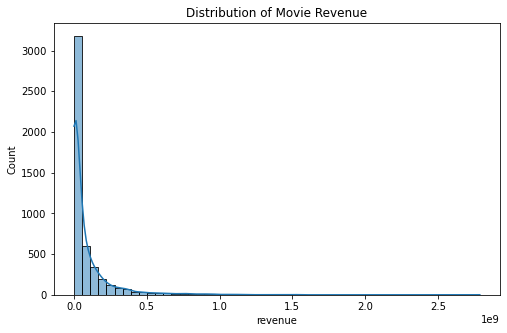

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df['revenue'], bins=50, kde=True)
plt.title("Distribution of Movie Revenue")
plt.show()

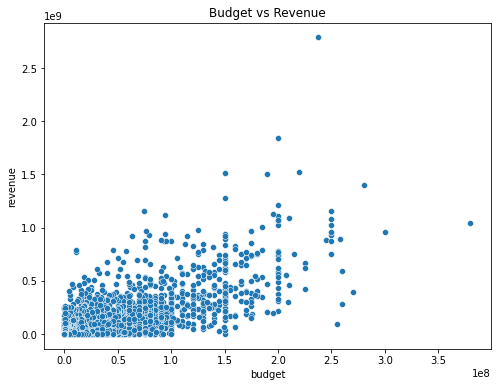

In [28]:
# Budget vs Revenue
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title("Budget vs Revenue")
plt.show()

### 3: Feature Engineering

The dataset has many JSON-like columns (genres, keywords, cast, crew). For simplicity, let’s extract only useful numeric features.

In [29]:
# Select relevant columns
df_model = df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'revenue']].copy()

# Remove rows with 0 revenue (unrealistic)
df_model = df_model[df_model['revenue'] > 0]

# Replace 0 budgets with NaN and drop
df_model['budget'] = df_model['budget'].replace(0, np.nan)
df_model = df_model.dropna()


### 4: Correlation & Insights

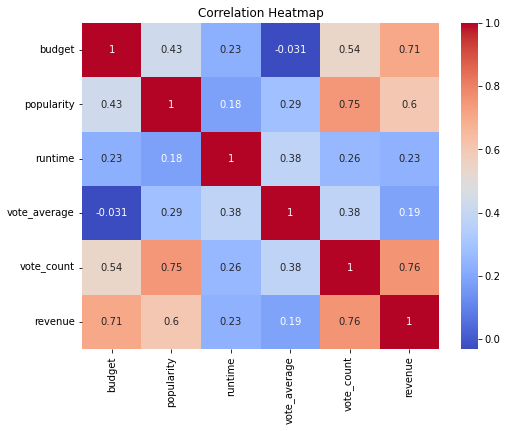

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df_model.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

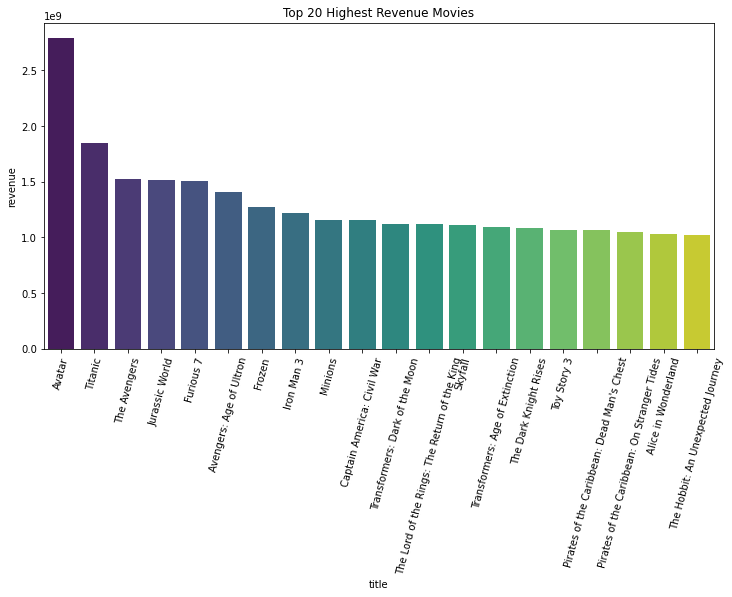

In [44]:
top_movies = df[['title','revenue','budget','popularity']].sort_values(by="revenue", ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x='title', y='revenue', data=top_movies, palette="viridis")
plt.xticks(rotation=75)
plt.title("Top 20 Highest Revenue Movies")
plt.show()

### 5: Train Regression Models

In [33]:
# Define features & target
X = df_model.drop('revenue', axis=1)
y = df_model['revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R2: 0.6557836456803727
Linear Regression RMSE: 131903328.49199453


In [37]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R2: 0.7105146509662754
Random Forest RMSE: 120963208.81694941


### 6: Dashboard-Style Visualizations

In [45]:
# Budget vs Revenue (interactive)
fig = px.scatter(df_model, x='budget', y='revenue', size='popularity', color='vote_average',
                 hover_data=['runtime'], title="Budget vs Revenue (Interactive)")
fig.show()

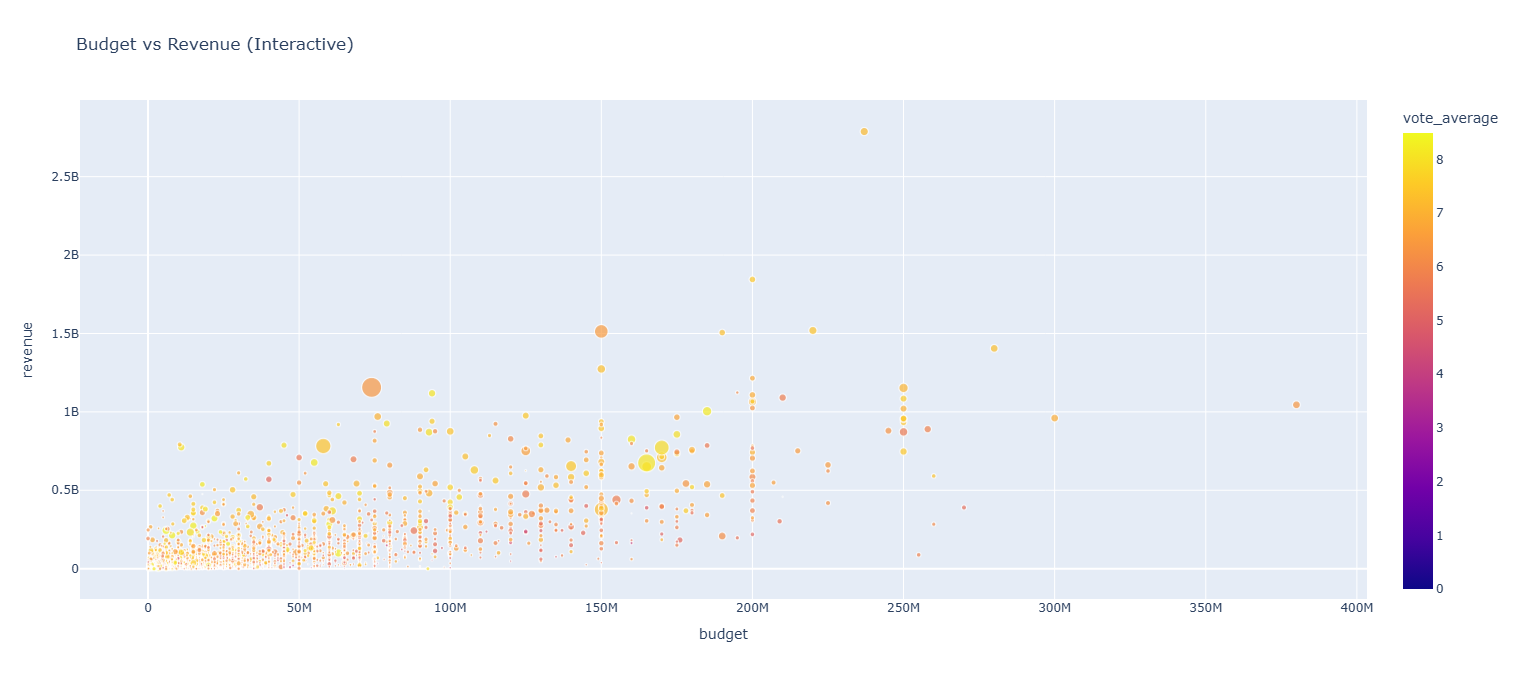

In [46]:
# Revenue vs Runtime
fig = px.scatter(df_model, x='runtime', y='revenue', color='vote_average',
                 title="Runtime vs Revenue")
fig.show()


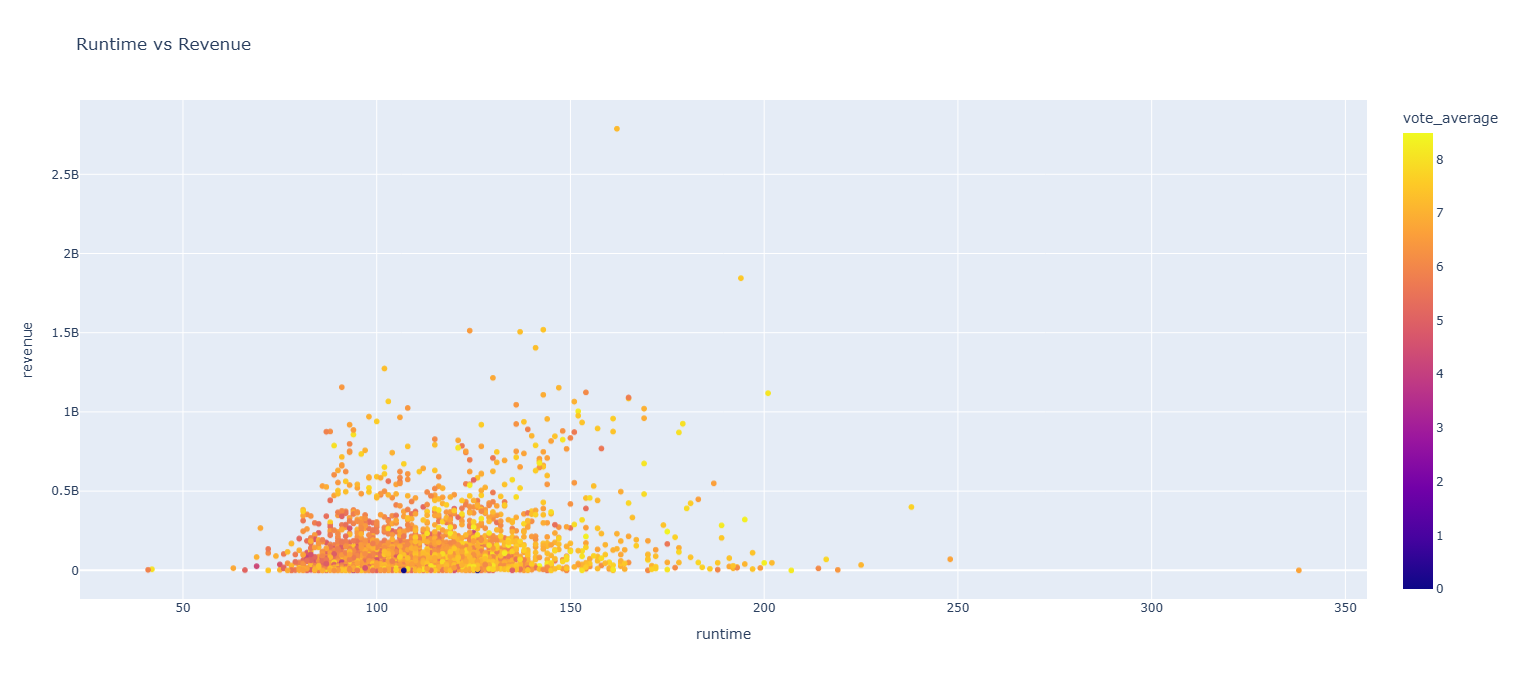

In [47]:
# Feature Importance (Random Forest)
importances = rf.feature_importances_
feat_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_importance = feat_importance.sort_values(by="Importance", ascending=False)

fig = px.bar(feat_importance, x='Feature', y='Importance', title="Feature Importance (Random Forest)")
fig.show()

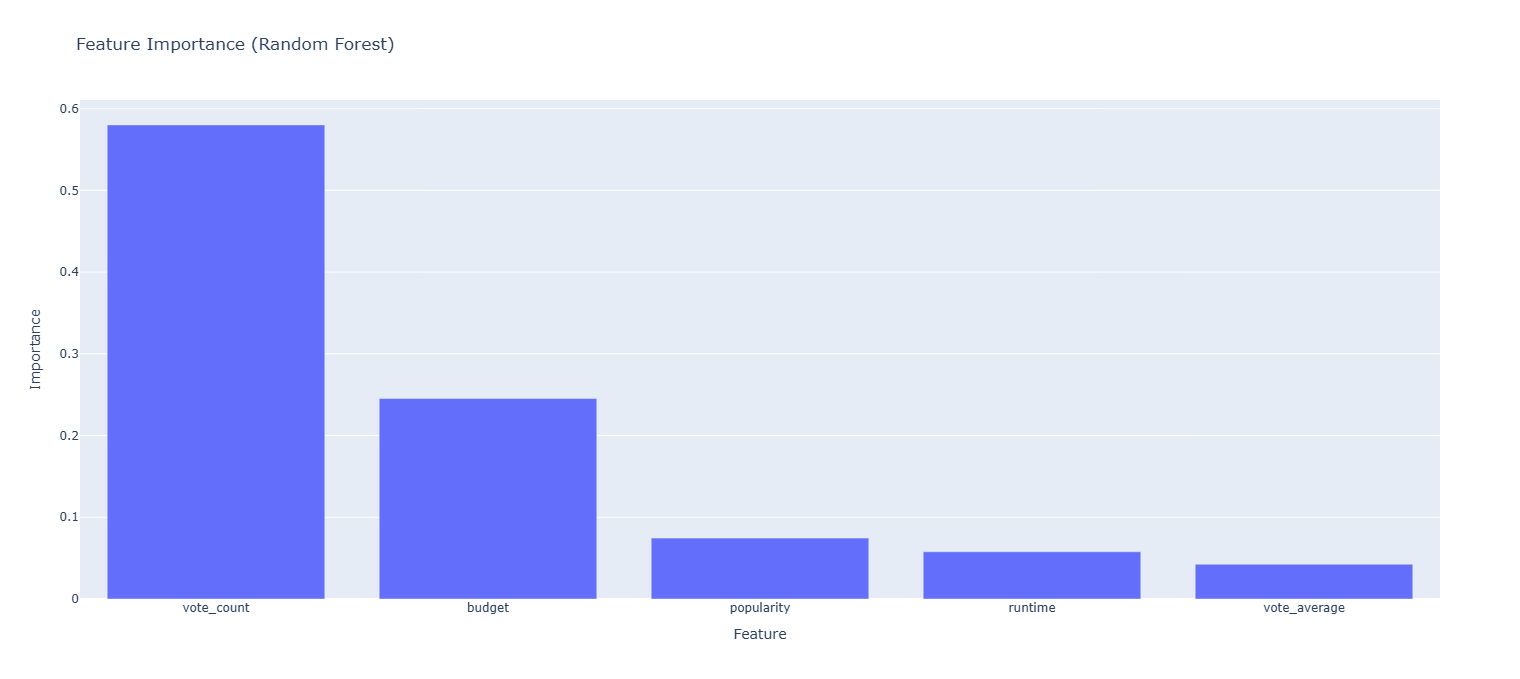

This project successfully demonstrated how data science techniques (EDA + ML models) can be applied to understand and predict movie revenues.
While the dataset is limited in scope (only numeric features used), results highlight that budget + audience engagement (votes, popularity) are strong drivers of revenue. With additional features like genres, cast, and director, model accuracy could improve further.